author: Diogo Silva

SKL = SciKit-Learn

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import seaborn as sns

In [3]:
home = %env HOME

In [4]:
cd $home/QCThesis/

/home/chiroptera/workspace/QCThesis


In [13]:
from sklearn.cluster import KMeans as KMeans_skl
import MyML.cluster.eac as eac
reload(eac)
import MyML.cluster.K_Means3 as K_Means3
reload(K_Means3)
import MyML.metrics.accuracy as determine_ci
reload(determine_ci)

<module 'MyML.metrics.accuracy' from 'MyML/metrics/accuracy.pyc'>

# Helper functions

In [14]:
def stat_my_kmeans(data,nclusters,gtruth,rounds=20):
    nsamples=data.shape[0]
    all_acc = list()
    for r in xrange(rounds):
        iters="converge"
        kmeans_mode="numpy"

        grouper = K_Means3.K_Means(n_clusters=nclusters, mode=kmeans_mode, cuda_mem='manual',tol=1e-4,max_iters=iters)
        grouper._centroid_mode = "iter"
        grouper.fit(data)


        myAcc = determine_ci.HungarianIndex(nsamples=nsamples)
        myAcc.score(gtruth,grouper.labels_,format='array')
        
        all_acc.append(myAcc.accuracy)
        
        
    return np.mean(all_acc),np.var(all_acc),np.max(all_acc),np.min(all_acc)
    
def stat_skl_kmeans(data,nclusters,gtruth,rounds=20,init='random'):
    nsamples=data.shape[0]
    all_acc = list()
    for r in xrange(rounds):
        iters="converge"
        kmeans_mode="numpy"

        gSKL = KMeans_skl(n_clusters=nclusters,n_init=1,init=init)
        gSKL.fit(data)

        myAcc = determine_ci.HungarianIndex(nsamples=nsamples)
        myAcc.score(gtruth,grouper.labels_,format='array')
        
        all_acc.append(myAcc.accuracy)
        
        
    return np.mean(all_acc),np.var(all_acc),np.max(all_acc),np.min(all_acc)

In [15]:
print "b MyML/cluster/K_Means3.py:"

b MyML/cluster/K_Means3.py:


In [16]:
def k_analysis(partition_files,ground_truth,nprots,iters="converge",rounds=20,files=True):
    nsamples=data.shape[0]
    all_acc = list()
    
    for r in xrange(rounds):
        prot_mode="random"

        estimator=eac.EAC(nsamples)
        estimator.fit(partition_files,files=files,assoc_mode='prot', prot_mode=prot_mode, nprot=nprots,build_only=True)

        kmeans_mode = "numpy"
        nclusters = np.unique(ground_truth).shape[0]

        grouper = K_Means3.K_Means(n_clusters=nclusters,mode=kmeans_mode, cuda_mem='manual',tol=1e-4,max_iters=iters)
        grouper._centroid_mode = "iter"
        grouper.fit(estimator._coassoc)

        myAcc = determine_ci.HungarianIndex(nsamples=nsamples)
        myAcc.score(ground_truth,grouper.labels_,format='array')
        
        all_acc.append(myAcc.accuracy)
    return np.mean(all_acc),np.var(all_acc),np.max(all_acc),np.min(all_acc)

def k_skl_analysis(partition_files,ground_truth,nprots,rounds=20,files=True):
    nsamples=data.shape[0]
    all_acc = list()
    
    for r in xrange(rounds):
        prot_mode="random"

        estimator=eac.EAC(nsamples)
        estimator.fit(partition_files,files=files,assoc_mode='prot', prot_mode=prot_mode, nprot=nprots,build_only=True)

        kmeans_mode = "numpy"
        nclusters = np.unique(ground_truth).shape[0]


        grouper = KMeans_skl(n_clusters=nclusters,n_init=1,init="random")
        grouper.fit(estimator._coassoc)
        
        myAcc = determine_ci.HungarianIndex(nsamples=nsamples)
        myAcc.score(ground_truth,grouper.labels_,format='array')
        
        all_acc.append(myAcc.accuracy)
    return np.mean(all_acc),np.var(all_acc),np.max(all_acc),np.min(all_acc)

# Generate data

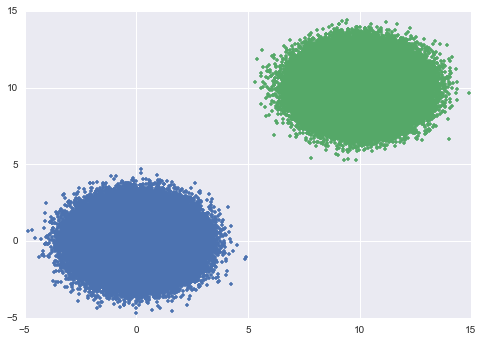

In [47]:
center1=(0,0)
center2=(10,10)

cov1=1
cov2=1

n1=500000
n2=500000
nsamples=n1+n2
dim=2

g1 = np.random.normal(loc=center1,scale=cov1,size=(n1,dim)).astype(np.float32)
g2 = np.random.normal(loc=center2,scale=cov2,size=(n2,dim)).astype(np.float32)

data = np.vstack((g1,g2))
gt=np.zeros(data.shape[0],dtype=np.int32)
gt[100:]=1

figData=plt.figure()
plt.plot(g1[:,0],g1[:,1],'.')
plt.plot(g2[:,0],g2[:,1],'.')

In [48]:
import MyML.helper.partition
reload(MyML.helper.partition)

<module 'MyML.helper.partition' from 'MyML/helper/partition.pyc'>

In [49]:
py_estimator=K_Means3.K_Means(n_clusters=20,mode="numpy", cuda_mem='manual',tol=1e-4,max_iter=3)
cu_estimator=K_Means3.K_Means(n_clusters=20,mode="cuda", cuda_mem='manual',tol=1e-4,max_iter=3)

In [50]:
%timeit MyML.helper.partition.generateEnsemble(data,cu_estimator,n_clusters=[6,30],npartitions=30,iters=3)
%timeit MyML.helper.partition.generateEnsemble(data,py_estimator,n_clusters=[6,30],npartitions=30,iters=3)

1 loops, best of 3: 48.1 s per loop
1 loops, best of 3: 2min 6s per loop


In [174]:
cProfile.run("grouperSKL.fit(data)")

         481 function calls in 0.063 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.063    0.063 <string>:1(<module>)
        3    0.002    0.001    0.002    0.001 _k_means.pyx:244(_centers_dense)
       19    0.000    0.000    0.001    0.000 _methods.py:31(_sum)
        3    0.000    0.000    0.000    0.000 _methods.py:43(_count_reduce_items)
        2    0.000    0.000    0.001    0.001 _methods.py:53(_mean)
        1    0.000    0.000    0.003    0.003 _methods.py:77(_var)
        6    0.000    0.000    0.000    0.000 _weakrefset.py:70(__contains__)
        3    0.000    0.000    0.000    0.000 abc.py:128(__instancecheck__)
       45    0.000    0.000    0.000    0.000 base.py:865(isspmatrix)
        3    0.000    0.000    0.010    0.003 extmath.py:168(safe_sparse_dot)
        3    0.000    0.000    0.000    0.000 extmath.py:44(squared_norm)
        4    0.000    0.000    0.000    0.000 

In [200]:
cProfile.run("grouper.fit(data)")

         2991 function calls (2940 primitive calls) in 0.066 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.066    0.066 <string>:1(<module>)
        9    0.000    0.000    0.000    0.000 <string>:8(__new__)
        1    0.000    0.000    0.000    0.000 K_Means3.py:133(_init_centroids)
        3    0.000    0.000    0.021    0.007 K_Means3.py:161(_label)
        3    0.000    0.000    0.021    0.007 K_Means3.py:341(_cu_label)
        3    0.000    0.000    0.001    0.000 K_Means3.py:398(_cu_label_kernel)
        3    0.000    0.000    0.045    0.015 K_Means3.py:563(_recompute_centroids)
        3    0.018    0.006    0.045    0.015 K_Means3.py:625(_np_recompute_centroids_good)
        1    0.000    0.000    0.066    0.066 K_Means3.py:79(fit)
        3    0.000    0.000    0.000    0.000 _methods.py:31(_sum)
       18    0.000    0.000    0.000    0.000 _methods.py:34(_prod)
       60    0.0

## Generate partitions, k=6,10,[4,25]

In [9]:
def formatPartition(partition):
    clusters=np.unique(partition)
    nclusters=clusters.size
    finalPartition=[None]*nclusters
    for c,l in clusters:
        finalPartition[c] = np.where(clusters==l)

    return finalPartition

def generatePartitions(data,npartitions,nclusters,iters=3):
    
    if type(nclusters) is list:
        clusterRange = True
        min_ncluster=nclusters[0]
        max_ncluster=nclusters[1]
    else:
        clusterRange = False
        k = nclusters
        
    partitions = list()
    
    mode = "numpy"
    for p in xrange(npartitions):
        if clusterRange:
            k = np.random.randint(min_ncluster,max_ncluster)
        
        grouper = K_Means3.K_Means(n_clusters=k,mode=mode, cuda_mem='manual',tol=1e-4,max_iters=iters)
        grouper._centroid_mode = "index"
        grouper.fit(data)
        partitions.append(grouper.partition)
        
    return partitions
        
def generatePartitionsSKL(data,npartitions,nclusters,iters=3):
    
    if type(nclusters) is list:
        clusterRange = True
        min_ncluster=nclusters[0]
        max_ncluster=nclusters[1]
    else:
        clusterRange = False
        k = nclusters
        
    partitions = list()
    
    mode = "numpy"
    for p in xrange(npartitions):
        if clusterRange:
            k = np.random.randint(min_ncluster,max_ncluster)
        
        gSKL = KMeans_skl(n_clusters=k,n_init=1,init="random",max_iter=iters)
        gSKL.fit(data)
        partitions.append(formatPartition(gSKL.labels_))
        
    return partitions
    

In [11]:
reload(K_Means3)

<module 'MyML.cluster.K_Means3' from 'MyML/cluster/K_Means3.py'>

In [13]:
npartitions=30
iters=3

nclusters=10
partitions_my_10 = generatePartitions(data=data,npartitions=npartitions,nclusters=nclusters,iters=iters)
partitions_skl_10 = generatePartitions(data=data,npartitions=npartitions,nclusters=nclusters,iters=iters)

if type(nclusters) is not list:
    allGood=True
    for p in xrange(npartitions):
        if len(partitions_my_10[p]) != nclusters:
            print 'partition {} of partitions_my has different number of clusters:{}'.format(p,len(partitions_my_10[p]))
            allGood=False
        if len(partitions_skl_10[p]) != nclusters:
            print 'partition {} of partitions_my has different number of clusters:{}'.format(p,len(partitions_skl_10[p]))
            allGood=False
    if allGood:
        print 'All partitions have good number of clusters.'

nclusters=6
partitions_my_6 = generatePartitions(data=data,npartitions=npartitions,nclusters=nclusters,iters=iters)
partitions_skl_6 = generatePartitions(data=data,npartitions=npartitions,nclusters=nclusters,iters=iters)

if type(nclusters) is not list:
    allGood=True
    for p in xrange(npartitions):
        if len(partitions_my_6[p]) != nclusters:
            print 'partition {} of partitions_my has different number of clusters:{}'.format(p,len(partitions_my_6[p]))
            allGood=False
        if len(partitions_skl_6[p]) != nclusters:
            print 'partition {} of partitions_my has different number of clusters:{}'.format(p,len(partitions_skl_6[p]))
            allGood=False
    if allGood:
        print 'All partitions have good number of clusters.'

nclusters=[4,25]
partitions_my_rand = generatePartitions(data=data,npartitions=npartitions,nclusters=nclusters,iters=iters)
partitions_skl_rand = generatePartitions(data=data,npartitions=npartitions,nclusters=nclusters,iters=iters)

if type(nclusters) is not list:
    allGood=True
    for p in xrange(npartitions):
        if len(partitions_my_rand[p]) != nclusters:
            print 'partition {} of partitions_my has different number of clusters:{}'.format(p,len(partitions_my[p]))
            allGood=False
        if len(partitions_skl_rand[p]) != nclusters:
            print 'partition {} of partitions_my has different number of clusters:{}'.format(p,len(partitions_skl[p]))
            allGood=False
    if allGood:
        print 'All partitions have good number of clusters.'

All partitions have good number of clusters.
All partitions have good number of clusters.


### Visualizing some partitions

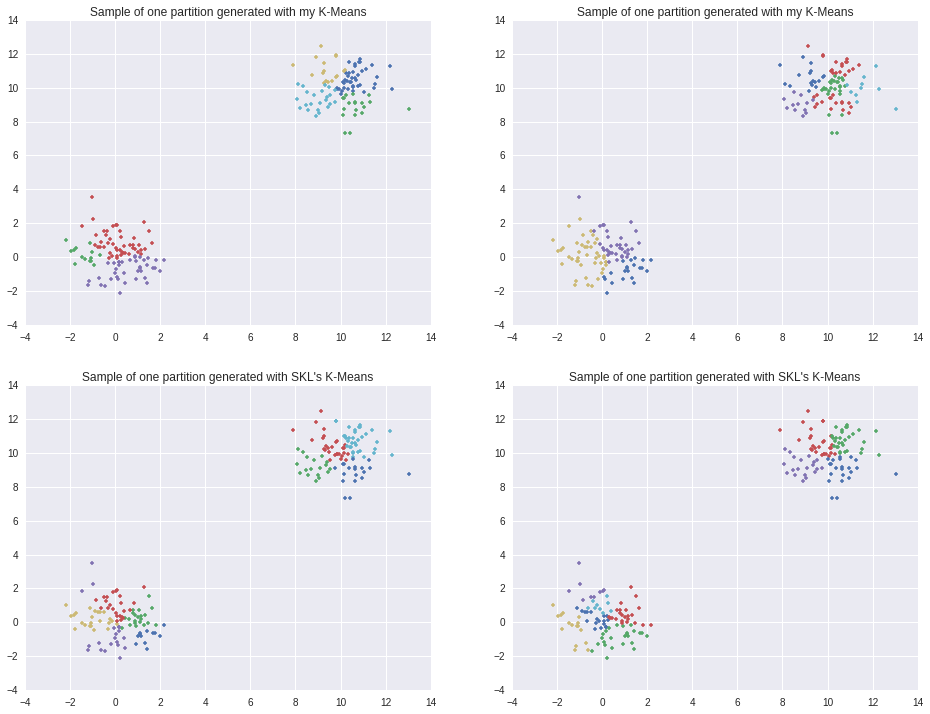

In [14]:
figEnsemble=plt.figure(figsize=(16,12))
ax1En=figEnsemble.add_subplot(2,2,1)
ax2En=figEnsemble.add_subplot(2,2,2)
ax3En=figEnsemble.add_subplot(2,2,3)
ax4En=figEnsemble.add_subplot(2,2,4)

for c in partitions_my_10[0]:
    ax1En.plot(data[c,0],data[c,1],'.')
ax1En.set_title("Sample of one partition generated with my K-Means")

for c in partitions_my_10[1]:
    ax2En.plot(data[c,0],data[c,1],'.')
ax2En.set_title("Sample of one partition generated with my K-Means")

for c in partitions_skl_10[0]:
    ax3En.plot(data[c,0],data[c,1],'.')
ax3En.set_title("Sample of one partition generated with SKL's K-Means")

for c in partitions_skl_10[1]:
    ax4En.plot(data[c,0],data[c,1],'.')
ax4En.set_title("Sample of one partition generated with SKL's K-Means")

# EAC K-Means

## 6 clusters per partition

My Accuracy:	1.0
SKL Accuracy:	1.0


MyML/helper/partition.py:56: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if clusts == None:


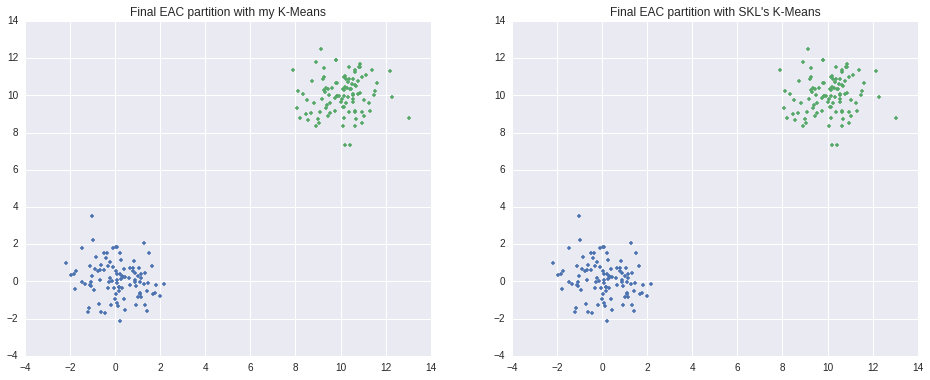

In [15]:
# generate coassoc
prot_mode="random"
assoc_mode='prot' # prot or full
nprots=nsamples # number of prototypes

partitions_used = partitions_my_6

myEstimator=eac.EAC(nsamples)
myEstimator.fit(partitions_used,files=False,assoc_mode=assoc_mode, prot_mode=prot_mode, nprot=nprots,build_only=True)

# final clustering with the true number of clusters
true_nclusters = np.unique(gt).shape[0]

# cluster with my K-Means
kmeans_mode = "numpy"

grouper = K_Means3.K_Means(n_clusters=true_nclusters, mode=kmeans_mode, cuda_mem='manual',tol=1e-4,max_iters=iters)
grouper._centroid_mode = "index"
grouper.fit(myEstimator._coassoc)

# cluster with SKL K-Means
gSKL = KMeans_skl(n_clusters=true_nclusters,n_init=1,init="random")
gSKL.fit(myEstimator._coassoc)

# Hungarian accuracy
myAcc = determine_ci.HungarianIndex(nsamples=nsamples)
myAcc.score(gt,grouper.labels_,format='array')

sklAcc = determine_ci.HungarianIndex(nsamples=nsamples)
sklAcc.score(gt,gSKL.labels_,format='array')


print 'My Accuracy:\t',myAcc.accuracy
print 'SKL Accuracy:\t',sklAcc.accuracy

figEAC=plt.figure(figsize=(16,6))
ax1EAC=figEAC.add_subplot(1,2,1)
ax2EAC=figEAC.add_subplot(1,2,2)

for c in np.unique(grouper.labels_):
    clusterData=grouper.labels_==c
    ax1EAC.plot(data[clusterData,0],data[clusterData,1],'.')
ax1EAC.set_title("Final EAC partition with my K-Means")

for c in np.unique(gSKL.labels_):
    clusterData=gSKL.labels_==c
    ax2EAC.plot(data[clusterData,0],data[clusterData,1],'.')
ax2EAC.set_title("Final EAC partition with SKL's K-Means")

Accuracy is usually 100% in both cases (clustering from my K-Means and SciKit-Learn's). This depends on the ensemble. For some ensembles the accuracy on both is always one, for others it sometimes is not in one or both of the K-Means used (mine vs SKL).

The number of prototypes is equal to the number of samples and since there are not repeated prototypes, all the samples are being used. Above are the visualizations of the solutions. 

### Statistic analysis

In [17]:
stat_nprots=nsamples
print "{}\t{}\t{}\t{}\t{}".format("type","mean","var","max","min")
print "skl \t",
for metric in k_skl_analysis(partitions_used,files=False,ground_truth=gt,nprots=stat_nprots,rounds=100):
    print "{}\t".format(metric),
print "\nmy  \t",
for metric in k_analysis(partitions_used,files=False,ground_truth=gt,nprots=stat_nprots,iters="converge",rounds=100):
    print "{}\t".format(metric),


type	mean	var	max	min
skl 	1.0	0.0	1.0	1.0	
my  	1.0	0.0	1.0	1.0	

In [29]:
nprots=[5,20,40,60,80,100,120,140,160,180,200]

results_k10=list()
for n in nprots:
    print '.',
    r=k_analysis(partitions_used,files=False,ground_truth=gt,nprots=n,rounds=100)
    results_k10.append(r)
    
mean_k10=[res[0] for res in results_k10]
var_k10=[res[1] for res in results_k10]
best_k10=[res[2] for res in results_k10]
worst_k10=[res[3] for res in results_k10]

plt.plot(mean_k10,label='mean')
plt.plot(best_k10,label='best')
plt.plot(worst_k10,label='worst')
plt.plot([0, 10], [0.5, 0.5], 'k-', lw=1)
plt.title("Analysis of the influence of the number of prototypes")
plt.legend(loc='best')

.

KeyboardInterrupt: 

## 10 clusters per partition

My Accuracy:	1.0
SKL Accuracy:	1.0

Statistical analysis
type	mean	var	max	min
skl 	0.98525	0.0034096875	1.0	0.75	
my  	0.9925	0.00181875	1.0	0.75	

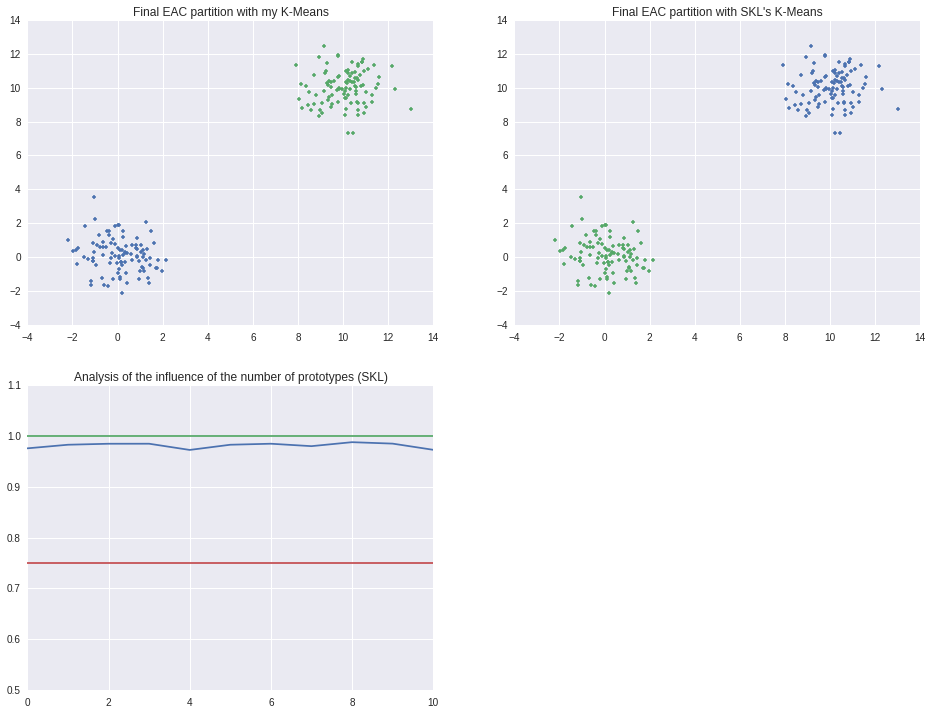

In [19]:
partitions_used = partitions_my_10

# generate coassoc
prot_mode="random"
assoc_mode='prot' # prot or full
nprots=nsamples # number of prototypes

myEstimator=eac.EAC(nsamples)
myEstimator.fit(partitions_used,files=False,assoc_mode=assoc_mode, prot_mode=prot_mode, nprot=nprots,build_only=True)

# final clustering with the true number of clusters
true_nclusters = np.unique(gt).shape[0]

# cluster with my K-Means
kmeans_mode = "numpy"

grouper = K_Means3.K_Means(n_clusters=true_nclusters, mode=kmeans_mode, cuda_mem='manual',tol=1e-4,max_iters=iters)
grouper._centroid_mode = "iter"
grouper.fit(myEstimator._coassoc)

# cluster with SKL K-Means
gSKL = KMeans_skl(n_clusters=true_nclusters,n_init=1,init="random")
gSKL.fit(myEstimator._coassoc)

# Hungarian accuracy
myAcc = determine_ci.HungarianIndex(nsamples=nsamples)
myAcc.score(gt,grouper.labels_,format='array')

sklAcc = determine_ci.HungarianIndex(nsamples=nsamples)
sklAcc.score(gt,gSKL.labels_,format='array')


print 'My Accuracy:\t',myAcc.accuracy
print 'SKL Accuracy:\t',sklAcc.accuracy

figEAC2=plt.figure(figsize=(16,12))
ax1EAC2=figEAC2.add_subplot(2,2,1)
ax2EAC2=figEAC2.add_subplot(2,2,2)
ax3EAC2=figEAC2.add_subplot(2,2,3)

for c in np.unique(grouper.labels_):
    clusterData=grouper.labels_==c
    ax1EAC2.plot(data[clusterData,0],data[clusterData,1],'.')
ax1EAC2.set_title("Final EAC partition with my K-Means")

for c in np.unique(gSKL.labels_):
    clusterData=gSKL.labels_==c
    ax2EAC2.plot(data[clusterData,0],data[clusterData,1],'.')
ax2EAC2.set_title("Final EAC partition with SKL's K-Means")

nprots=[5,20,40,60,80,100,120,140,160,180,200]
results_k6=list()
for n in nprots:
    r=k_skl_analysis(partitions_used,files=False,ground_truth=gt,nprots=stat_nprots,rounds=100)
    results_k6.append(r)
    
mean_k6=[res[0] for res in results_k6]
var_k6=[res[1] for res in results_k6]
best_k6=[res[2] for res in results_k6]
worst_k6=[res[3] for res in results_k6]

ax3EAC2.plot(mean_k6)
ax3EAC2.plot(best_k6)
ax3EAC2.plot(worst_k6)
ax3EAC2.plot([0, 10], [0.5, 0.5], 'k-', lw=1)
ax3EAC2.set_title("Analysis of the influence of the number of prototypes (SKL)")

print "\nStatistical analysis"
stat_nprots=nsamples
print "{}\t{}\t{}\t{}\t{}".format("type","mean","var","max","min")
print "skl \t",
for metric in k_skl_analysis(partitions_used,files=False,ground_truth=gt,nprots=stat_nprots,rounds=100):
    print "{}\t".format(metric),
print "\nmy  \t",
for metric in k_analysis(partitions_used,files=False,ground_truth=gt,nprots=stat_nprots,iters="converge",rounds=100):
    print "{}\t".format(metric),

## Random number of clusters per partition

My Accuracy:	0.78
SKL Accuracy:	1.0


KeyboardInterrupt: 

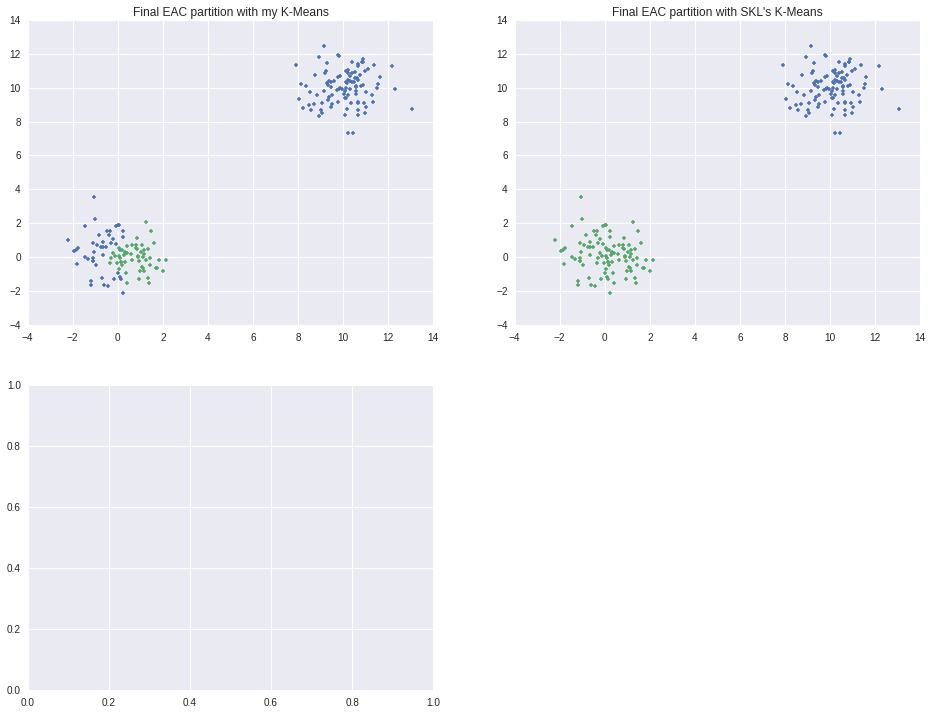

In [20]:
partitions_used = partitions_my_rand

# generate coassoc
prot_mode="random"
assoc_mode='prot' # prot or full
nprots=nsamples # number of prototypes

myEstimator=eac.EAC(nsamples)
myEstimator.fit(partitions_used,files=False,assoc_mode=assoc_mode, prot_mode=prot_mode, nprot=nprots,build_only=True)

# final clustering with the true number of clusters
true_nclusters = np.unique(gt).shape[0]

# cluster with my K-Means
kmeans_mode = "numpy"

grouper = K_Means3.K_Means(n_clusters=true_nclusters, mode=kmeans_mode, cuda_mem='manual',tol=1e-4,max_iters=iters)
grouper._centroid_mode = "iter"
grouper.fit(myEstimator._coassoc)

# cluster with SKL K-Means
gSKL = KMeans_skl(n_clusters=true_nclusters,n_init=1,init="random")
gSKL.fit(myEstimator._coassoc)

# Hungarian accuracy
myAcc = determine_ci.HungarianIndex(nsamples=nsamples)
myAcc.score(gt,grouper.labels_,format='array')

sklAcc = determine_ci.HungarianIndex(nsamples=nsamples)
sklAcc.score(gt,gSKL.labels_,format='array')


print 'My Accuracy:\t',myAcc.accuracy
print 'SKL Accuracy:\t',sklAcc.accuracy

figEAC2=plt.figure(figsize=(16,12))
ax1EAC2=figEAC2.add_subplot(2,2,1)
ax2EAC2=figEAC2.add_subplot(2,2,2)
ax3EAC2=figEAC2.add_subplot(2,2,3)

for c in np.unique(grouper.labels_):
    clusterData=grouper.labels_==c
    ax1EAC2.plot(data[clusterData,0],data[clusterData,1],'.')
ax1EAC2.set_title("Final EAC partition with my K-Means")

for c in np.unique(gSKL.labels_):
    clusterData=gSKL.labels_==c
    ax2EAC2.plot(data[clusterData,0],data[clusterData,1],'.')
ax2EAC2.set_title("Final EAC partition with SKL's K-Means")

nprots=[5,20,40,60,80,100,120,140,160,180,200]
results_k6=list()
for n in nprots:
    r=k_skl_analysis(partitions_used,files=False,ground_truth=gt,nprots=stat_nprots,rounds=100)
    results_k6.append(r)
    
mean_k6=[res[0] for res in results_k6]
var_k6=[res[1] for res in results_k6]
best_k6=[res[2] for res in results_k6]
worst_k6=[res[3] for res in results_k6]

ax3EAC2.plot(mean_k6)
ax3EAC2.plot(best_k6)
ax3EAC2.plot(worst_k6)
ax3EAC2.plot([0, 10], [0.5, 0.5], 'k-', lw=1)
ax3EAC2.set_title("Analysis of the influence of the number of prototypes (SKL)")

print "\nStatistical analysis"
stat_nprots=nsamples
print "{}\t{}\t{}\t{}\t{}".format("type","mean","var","max","min")
print "skl \t",
for metric in k_skl_analysis(partitions_used,files=False,ground_truth=gt,nprots=stat_nprots,rounds=100):
    print "{}\t".format(metric),
print "\nmy  \t",
for metric in k_analysis(partitions_used,files=False,ground_truth=gt,nprots=stat_nprots,iters="converge",rounds=100):
    print "{}\t".format(metric),

In [ ]:
plt.pcolor(myEstimator._coassoc)

# K-Means only

In [ ]:
stat_nprots=nsamples
print "{}\t{}\t{}\t{}\t{}".format("type","mean","var","max","min")
print "my  \t",
for metric in stat_my_kmeans(data,true_nclusters,gt,rounds=100):
    print "{}\t".format(metric),
print "\nskl \t",
for metric in stat_skl_kmeans(data,true_nclusters,gt,rounds=100):
    print "{}\t".format(metric),

# EAC K-Medoids

In [ ]:
import MyML.cluster.KMedoids as KMedoids

## 6 clusters per partition

In [ ]:
#%%debug
partitions_used = partitions_my_6

# generate coassoc
prot_mode="random"
assoc_mode='full' # prot or full
nprots=50 # number of prototypes

myEstimator=eac.EAC(nsamples)
myEstimator.fit(partitions_used,files=False,assoc_mode=assoc_mode, prot_mode=prot_mode, nprot=nprots,build_only=True)

# final clustering with the true number of clusters
true_nclusters = np.unique(gt).shape[0]

# compute diassociation from co-assoc
diassoc=myEstimator._coassoc.max()-myEstimator._coassoc

#k-medoids
labels,medoids=KMedoids.cluster(diassoc,k=true_nclusters)

# Hungarian accuracy
acc = determine_ci.HungarianIndex(nsamples=nsamples)
acc.score(gt,labels,format='array')

print 'K-Medoids Accuracy:\t',acc.accuracy

### Statistical analysis

In [ ]:
class acc_medoids():
    def __init__(self,data,nclusters,gt):
        self.data=data
        self.nsamples=data.shape[0]
        self.nclusters=nclusters
        self.gt=gt
        
    def run(self):
        labels,medoids=KMedoids.cluster(self.data,k=self.nclusters)
        # Hungarian accuracy
        acc = determine_ci.HungarianIndex(nsamples=self.nsamples)
        acc.score(self.gt,labels,format='array')
        return acc.accuracy
    
class acc_my_kmeans():
    def __init__(self,data,nclusters,gt):
        self.data=data
        self.nclusters=nclusters
        self.nsamples=data.shape[0]
        self.gt=gt
    def run(self):
        # cluster with SKL K-Means
        grouper = K_Means3.K_Means(n_clusters=true_nclusters,mode=kmeans_mode, cuda_mem='manual',tol=1e-4,max_iters=iters)
        grouper._centroid_mode = "iter"
        grouper.fit(self.data)

        # Hungarian accuracy
        sklAcc = determine_ci.HungarianIndex(nsamples=self.nsamples)
        sklAcc.score(self.gt,grouper.labels_,format='array')
        
        return sklAcc.accuracy    

class acc_skl_kmeans():
    def __init__(self,data,nclusters,gt):
        self.data=data
        self.nclusters=nclusters
        self.nsamples=data.shape[0]
        self.gt=gt
    def run(self):
        # cluster with SKL K-Means
        gSKL = KMeans_skl(n_clusters=self.nclusters,n_init=1,init="random")
        gSKL.fit(self.data)

        # Hungarian accuracy
        sklAcc = determine_ci.HungarianIndex(nsamples=self.nsamples)
        sklAcc.score(self.gt,gSKL.labels_,format='array')
        
        return sklAcc.accuracy

def stat_analysis(method,rounds=20):
    rAll = np.zeros(rounds)
    for r in xrange(rounds):
        rAll[r]=method.run()
    return rAll.mean(),rAll.var(),rAll.max(),rAll.min()

In [ ]:
rounds=100
diassoc=myEstimator._coassoc.max()-myEstimator._coassoc
x=acc_medoids(diassoc,nclusters=true_nclusters,gt=gt)
print 'diassoc kmedoids\t',stat_analysis(x,rounds=rounds)

x2=acc_my_kmeans(diassoc,nclusters=true_nclusters,gt=gt)
print 'diassoc kmeans  \t',stat_analysis(x2,rounds=rounds)

x3=acc_medoids(myEstimator._coassoc,nclusters=true_nclusters,gt=gt)
print 'assoc kmedoids  \t',stat_analysis(x3,rounds=rounds)

x4=acc_my_kmeans(myEstimator._coassoc,nclusters=true_nclusters,gt=gt)
print 'assoc kmeans    \t',stat_analysis(x4,rounds=rounds)

## 10 clusters per partition

In [ ]:
#%%debug
partitions_used = partitions_my_10

# generate coassoc
prot_mode="random"
assoc_mode='full' # prot or full
nprots=50 # number of prototypes

myEstimator=eac.EAC(nsamples)
myEstimator.fit(partitions_used,files=False,assoc_mode=assoc_mode, prot_mode=prot_mode, nprot=nprots,build_only=True)

# final clustering with the true number of clusters
true_nclusters = np.unique(gt).shape[0]

# compute diassociation from co-assoc
diassoc=myEstimator._coassoc.max()-myEstimator._coassoc

#k-medoids
labels,medoids=KMedoids.cluster(diassoc,k=true_nclusters)

# Hungarian accuracy
acc = determine_ci.HungarianIndex(nsamples=nsamples)
acc.score(gt,labels,format='array')

print 'K-Medoids Accuracy:\t',acc.accuracy

### Statistical analysis

In [ ]:
rounds=20
diassoc=myEstimator._coassoc.max()-myEstimator._coassoc
x=acc_medoids(diassoc,nclusters=true_nclusters,gt=gt)
print 'diassoc kmedoids\t',stat_analysis(x,rounds=rounds)

x2=acc_skl_kmeans(diassoc,nclusters=true_nclusters,gt=gt)
print 'diassoc kmeans  \t',stat_analysis(x2,rounds=rounds)

x3=acc_medoids(myEstimator._coassoc,nclusters=true_nclusters,gt=gt)
print 'assoc kmedoids  \t',stat_analysis(x3,rounds=rounds)

x4=acc_skl_kmeans(myEstimator._coassoc,nclusters=true_nclusters,gt=gt)
print 'assoc kmeans    \t',stat_analysis(x4,rounds=rounds)

## Random clusters per partition

In [ ]:
#%%debug
npartitions=30
nclusters=[4,25]
iters=3
partitions_used = partitions_my_rand

# generate coassoc
prot_mode="random"
assoc_mode='full' # prot or full
nprots=50 # number of prototypes

myEstimator=eac.EAC(nsamples)
myEstimator.fit(partitions_used,files=False,assoc_mode=assoc_mode, prot_mode=prot_mode, nprot=nprots,build_only=True)

# final clustering with the true number of clusters
true_nclusters = np.unique(gt).shape[0]

# compute diassociation from co-assoc
diassoc=myEstimator._coassoc.max()-myEstimator._coassoc

#k-medoids
labels,medoids=KMedoids.cluster(diassoc,k=true_nclusters)

# Hungarian accuracy
acc = determine_ci.HungarianIndex(nsamples=nsamples)
acc.score(gt,labels,format='array')

print 'K-Medoids Accuracy:\t',acc.accuracy

### Statistical analysis

In [ ]:
rounds=20
diassoc=myEstimator._coassoc.max()-myEstimator._coassoc
x=acc_medoids(diassoc,nclusters=true_nclusters,gt=gt)
print 'diassoc kmedoids\t',stat_analysis(x,rounds=rounds)

x2=acc_skl_kmeans(diassoc,nclusters=true_nclusters,gt=gt)
print 'diassoc kmeans  \t',stat_analysis(x2,rounds=rounds)

x3=acc_medoids(myEstimator._coassoc,nclusters=true_nclusters,gt=gt)
print 'assoc kmedoids  \t',stat_analysis(x3,rounds=rounds)

x4=acc_skl_kmeans(myEstimator._coassoc,nclusters=true_nclusters,gt=gt)
print 'assoc kmeans    \t',stat_analysis(x4,rounds=rounds)

## K-Medoids only

In [ ]:
from sklearn.metrics.pairwise import pairwise_distances

In [ ]:
pairwise=pairwise_distances(data)
y=acc_medoids(pairwise,2,gt=gt)
stat_analysis(y,rounds=20)

# EAC Single link

In [ ]:
partitions_used = partitions_my_rand

# generate coassoc
prot_mode="random"
assoc_mode='full' # prot or full
nprots=nsamples # number of prototypes

myEstimator=eac.EAC(nsamples)
myEstimator.fit(partitions_used,files=False,assoc_mode=assoc_mode, prot_mode=prot_mode, nprot=nprots,build_only=True)

# final clustering with the true number of clusters
true_nclusters = np.unique(gt).shape[0]

#k-medoids
myEstimator._apply_linkage()
labels = myEstimator._clusterFromLinkage()

# Hungarian accuracy
acc = determine_ci.HungarianIndex(nsamples=nsamples)
acc.score(gt,labels,format='array')

print 'EAC SL Accuracy:\t',acc.accuracy

## Single-Link only

In [ ]:
from scipy.cluster import hierarchy as hie
from scipy.spatial.distance import squareform

In [ ]:
# pairwise distances
dists = np.zeros((nsamples,nsamples))
for i,dp in enumerate(data):
    dist = (data - dp)**2
    dist = np.sqrt(dist.sum(axis=1))
    dists[i]=dist

In [ ]:
#pairwise=pairwise_distances(data)
condensed_dists = squareform(dists)
Z = hie.linkage(condensed_dists,method='single')
parents=Z[-1,:2]
labels=myEstimator._buildLabels(Z=Z,parents=parents)

acc.score(gt,labels,format='array')
print "Single-Link accuracy:\t",acc.accuracy

In [ ]:
#generated from: http://tools.medialab.sciences-po.fr/iwanthue/
my_colors=["#D37E30",
"#6F6FD8",
"#3AA579",
"#D5337B",
"#4595B8",
"#3EA729",
"#D150D7",
"#4E6E23",
"#8F4D79",
"#D64430",
"#A1952B",
"#C15257",
"#AA5BB3",
"#6A76B0",
"#8E5723",
"#2A7464",
"#D66C9F",
"#60994E",
"#73A32D",
"#33A74F"]
my_pallete=sns.color_palette(my_colors,len(my_colors))
sns.palplot(my_pallete)
sns.set_palette(my_pallete,len(my_colors))
#marker_types=['.','^','*','h','x']
marker_types=matplotlib.markers.MarkerStyle.filled_markers

In [ ]:
sns.set_style("whitegrid")

In [ ]:
figX=sns.plt.figure(figsize=(12,90))
for i,p in enumerate(partitions_my_rand):
    ax=figX.add_subplot(15,2,i+1)
    for j,c in enumerate(p):
        ax.plot(data[c,0],data[c,1],ls=u'None',marker=marker_types[j/6],markersize=8)
        #ax.scatter(data[c,0],data[c,1],marker=marker_types[j/6],linewidths=5)
    ax.set_title("partition {}, {} clusters".format(i+1,j+1))